In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# The column names to be added to the dataset

headers = ["City1", "City2", "Average Fare1", "Distance", "Average Weekly Passengers", "Market Leading Airline", "Market Share1", "Average Fare2", "Low Price Airline", "Market Share2", "Price"]

In [3]:
# Importing and storing the data

url = "http://www.stat.ufl.edu/~winner/data/airq402.dat"
data_frame = pd.read_fwf(url, names = headers)

In [4]:
data_frame.head()

,City1,City2,Average Fare1,Distance,Average Weekly Passengers,Market Leading Airline,Market Share1,Average Fare2,Low Price Airline,Market Share2,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [5]:
# Checking if any null values are present or not

data_frame.isnull().any()

City1                        False
City2                        False
Average Fare1                False
Distance                     False
Average Weekly Passengers    False
Market Leading Airline       False
Market Share1                False
Average Fare2                False
Low Price Airline            False
Market Share2                False
Price                        False
dtype: bool

In [6]:
# Removing the outliers from the data

Q1 = data_frame.quantile(0.25)
Q3 = data_frame.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Average Fare1                 71.4175
Distance                     899.0000
Average Weekly Passengers    512.7150
Market Share1                 27.0000
Average Fare2                 78.8925
Market Share2                 39.7775
Price                         54.7625
dtype: float64


In [7]:
dataframe2 = data_frame[~((data_frame < (Q1 - 1.5 * IQR)) |(data_frame > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
dataframe2.shape

(885, 11)

In [9]:
dataframe2.dtypes

City1                         object
City2                         object
Average Fare1                float64
Distance                       int64
Average Weekly Passengers    float64
Market Leading Airline        object
Market Share1                float64
Average Fare2                float64
Low Price Airline             object
Market Share2                float64
Price                        float64
dtype: object

In [10]:
# Treating “Average Fare1” as our dependent variable and rest of the columns as independent variables.

Independent_variables = dataframe2.drop('Average Fare1', axis=1)
Dependent_variable = dataframe2['Average Fare1']

In [11]:
# Dropping the independent variables which have less than 0.1 correlation with the dependent variable

corr = dataframe2.corr()
association = corr < 0.1
association

,Average Fare1,Distance,Average Weekly Passengers,Market Share1,Average Fare2,Market Share2,Price
Average Fare1,False,False,True,True,False,True,False
Distance,False,False,True,True,False,True,False
Average Weekly Passengers,True,True,False,True,True,True,True
Market Share1,True,True,True,False,True,False,True
Average Fare2,False,False,True,True,False,True,False
Market Share2,True,True,True,False,True,False,True
Price,False,False,True,True,False,True,False


In [12]:
# We will check the correlation of all variables with 'Average Fare1'. We will drop 'Average Weekly Passengers', 'Market Share1', 'Market Share2' as correlation is less than 0.1.

In [13]:
dataframe2 = dataframe2.drop(['Average Weekly Passengers', 'Market Share1', 'Market Share2'], axis = 1)
dataframe2.sample(5)

,City1,City2,Average Fare1,Distance,Market Leading Airline,Average Fare2,Low Price Airline,Price
922,PHX,IAD,288.58,1979,HP,247.91,HP,247.91
249,CLT,MIA,164.82,651,US,169.81,DL,154.95
394,DFW,LGB,204.22,1220,AA,202.79,AA,202.79
793,BNA,MSY,83.24,471,WN,80.44,WN,80.44
796,BNA,PHL,242.28,675,US,241.33,UA,145.18


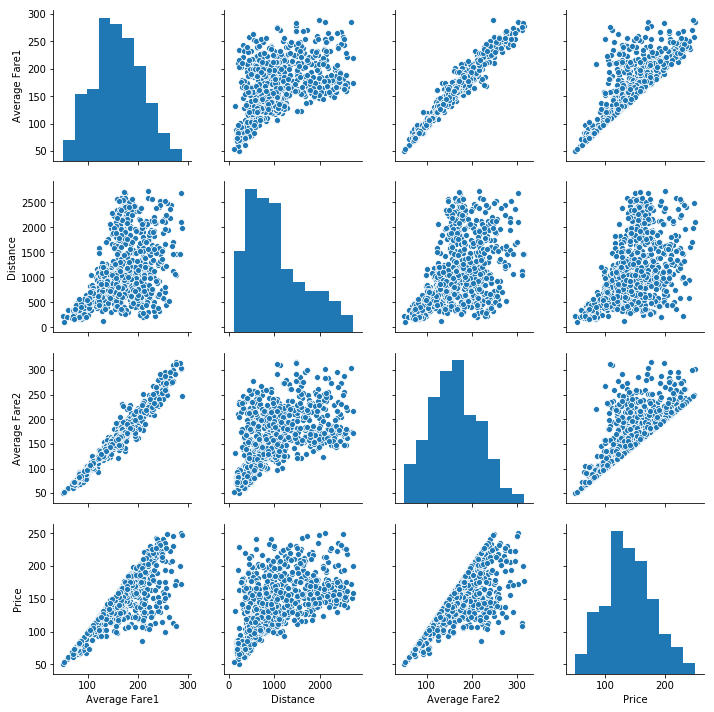

In [14]:
# Creating a scatter plot

sns.pairplot(dataframe2)

In [15]:
# Dividing the data set into training and test data set

X = dataframe2.drop(['Average Fare1', 'City1', 'City2', 'Market Leading Airline', 'Low Price Airline'], axis = 1)
Y = dataframe2['Average Fare1']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 101)

In [16]:
# Building a Multiple Linear Regression model

US_transport_model = LinearRegression()
US_transport_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
Prediction = US_transport_model.predict(X_test)
Prediction

array([202.69361556, 176.73025834,  86.03024599, 135.45913761,
       221.54332295, 216.86954602, 124.7077746 , 155.66277644,
       144.98634394,  91.21904954,  77.89834956, 137.72039393,
       153.28431805, 261.76111332, 218.92294839, 148.93766044,
       207.06615824, 133.33047966, 132.19289545, 185.53342593,
       212.53409147, 124.69442285, 123.77586198, 145.85440282,
       223.62007083, 170.4428401 , 167.33282015, 158.28426346,
       116.91090939, 202.03357221, 183.58436796, 139.78084045,
       166.18398148, 177.50548742, 158.63874963, 190.6473137 ,
       177.83336417, 210.63954518, 100.03864786, 153.70815857,
       161.6611056 , 131.51056173, 145.72654644, 195.30559061,
       249.88115802, 189.38876045, 167.62332818, 136.79559935,
       214.78930041, 149.34567833, 179.85696842,  94.54017789,
       237.15384576, 137.67041805, 187.53082007, 129.03724932,
       191.23834583, 133.5223312 , 127.10894757, 123.23111354,
       185.50663975, 117.04175721, 174.15097771, 186.76

In [18]:
# The coefficients of the linear regression model

for index_of_col, col_name in enumerate(X_train.columns):
    print("The coefficient for", col_name, "is", US_transport_model.coef_[index_of_col])

The coefficient for Distance is 0.002055348062939391
The coefficient for Average Fare2 is 0.7650034488713916
The coefficient for Price is 0.18700829143348932


In [19]:
# The intercept for the model

intercept = US_transport_model.intercept_
print("The intercept for our model is", format(intercept))

The intercept for our model is 7.551978605302395


In [20]:
# The accuracy of the overall mode

US_transport_model.score(X, Y)

0.9709567772124281